River is a Python library for online machine learning. It is the result of a merger between creme and scikit-multiflow. River's ambition is to be the go-to library for doing machine learning on streaming data.

<a href="https://github.com/MaxHalford/creme">Creme</a>

creme is a Python library for online machine learning. All the tools in the library can be updated with a single observation at a time, and can therefore be used to learn from streaming data.

<a href="https://github.com/scikit-multiflow/scikit-multiflow">Scikit-multiflow</a>

scikit-multiflow is a machine learning package for streaming data in Python.

## Lets get started with River

# Installation part

## 🛠 Installation

River is intended to work with **Python 3.6 or above**. Installation can be done with `pip`:

```sh
pip install river
```

There are [wheels available](https://pypi.org/project/river/#files) for Linux, MacOS, and Windows, which means that you most probably won't have to build River from source.

You can install the latest development version from GitHub as so:

```sh
pip install git+https://github.com/online-ml/river --upgrade
```

Or, through SSH:

```sh
pip install git+ssh://git@github.com/online-ml/river.git --upgrade
```

## 🧠 FACTS SURROUNDING THE CONCEPT RIVER

Machine learning is often done in a batch setting, whereby a model is fitted to a dataset in one go. This results in a static model which has to be retrained in order to learn from new data. In many cases, this isn't elegant nor efficient, and usually incurs [a fair amount of technical debt](https://research.google/pubs/pub43146/). Indeed, if you're using a batch model, then you need to think about maintaining a training set, monitoring real-time performance, model retraining, etc.

With River, we encourage a different approach, which is to continuously learn a stream of data. This means that the model process one observation at a time, and can therefore be updated on the fly. This allows to learn from massive datasets that don't fit in main memory. Online machine learning also integrates nicely in cases where new data is constantly arriving. It shines in many use cases, such as time series forecasting, spam filtering, recommender systems, CTR prediction, and IoT applications. If you're bored with retraining models and want to instead build dynamic models, then online machine learning (and therefore River!) might be what you're looking for.

Here are some benefits of using River (and online machine learning in general):

- **Incremental**: models can update themselves in real-time.
- **Adaptive**: models can adapt to [concept drift](https://www.wikiwand.com/en/Concept_drift).
- **Production-ready**: working with data streams makes it simple to replicate production scenarios during model development.
- **Efficient**: models don't have to be retrained and require little compute power, which [lowers their carbon footprint](https://arxiv.org/abs/1907.10597)
- **Fast**: when the goal is to learn and predict with a single instance at a time, then River is an order of magnitude faster than PyTorch, Tensorflow, and scikit-learn.

## 🔥 Features

- Linear models with a wide array of optimizers
- Nearest neighbors, decision trees, naïve Bayes
- [Progressive model validation](https://hunch.net/~jl/projects/prediction_bounds/progressive_validation/coltfinal.pdf)
- Model pipelines as a first-class citizen
- Anomaly detection
- Recommender systems
- Time series forecasting
- Imbalanced learning
- Clustering
- Feature extraction and selection
- Online statistics and metrics
- Built-in datasets
- And [much more](https://riverml.xyz/latest/api/overview/)

  ##  let get started by using the Logistic regression

As a example, we'll train a logistic regression to classify the [website phishing dataset](http://archive.ics.uci.edu/ml/datasets/Website+Phishing). Here's a look at the first observation in the dataset

In [1]:
!pip install river

In [2]:
>>> from pprint import pprint
>>> from river import datasets

>>> dataset = datasets.Phishing()

>>> for x, y in dataset:
...     pprint(x)
...     print(y)
...     break
{'age_of_domain': 1,
 'anchor_from_other_domain': 0.0,
 'empty_server_form_handler': 0.0,
 'https': 0.0,
 'ip_in_url': 1,
 'is_popular': 0.5,
 'long_url': 1.0,
 'popup_window': 0.0,
 'request_from_other_domain': 0.0}
True





{'age_of_domain': 1,
 'anchor_from_other_domain': 0.0,
 'empty_server_form_handler': 0.0,
 'https': 0.0,
 'ip_in_url': 1,
 'is_popular': 0.5,
 'long_url': 1.0,
 'popup_window': 0.0,
 'request_from_other_domain': 0.0}
True


True

Now let's run the model on the dataset in a streaming fashion. We sequentially interleave predictions and model updates. Meanwhile, we update a performance metric to see how well the model is doing.

In [4]:
>>> from river import compose
>>> from river import linear_model
>>> from river import metrics
>>> from river import preprocessing

>>> model = compose.Pipeline(
...     preprocessing.StandardScaler(),
...     linear_model.LogisticRegression()
... )

>>> metric = metrics.Accuracy()

>>> for x, y in dataset:
...     y_pred = model.predict_one(x)      # make a prediction
...     metric = metric.update(y, y_pred)  # update the metric
...     model = model.learn_one(x, y)      # make the model learn

>>> metric

Accuracy: 89.20%

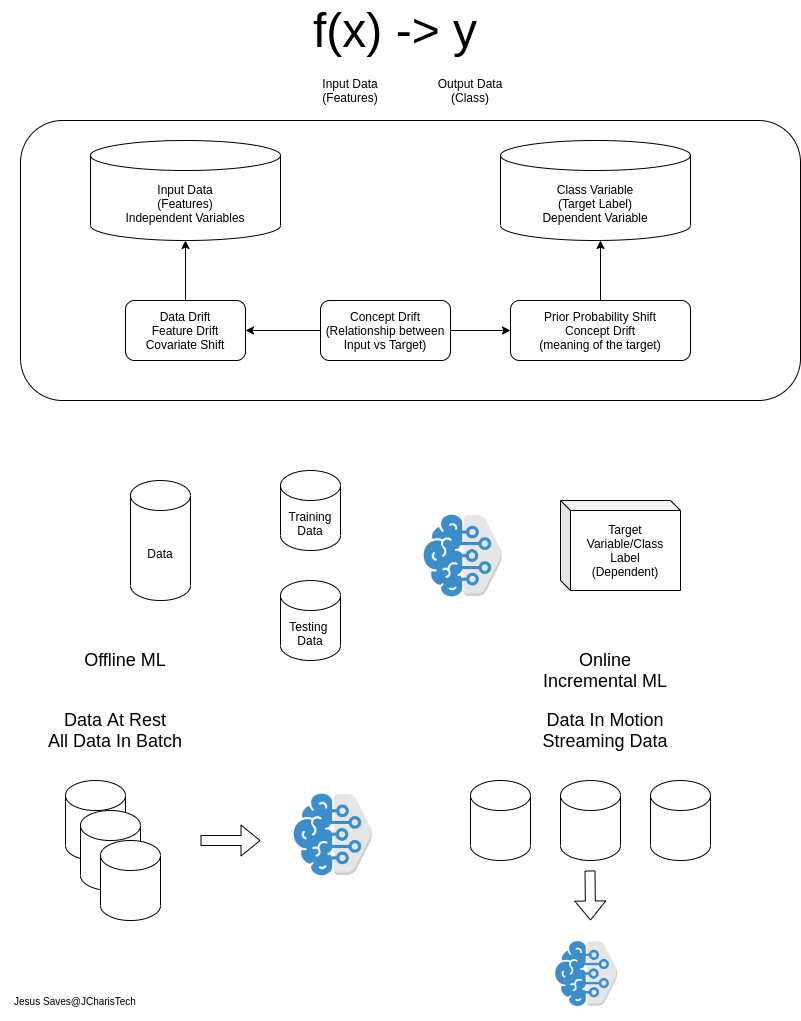

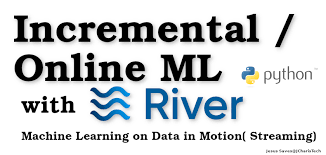